<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Day32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handling Categorical Missing Data**

# **1. Mode Imputation**
Replace the missing values with the most frequent category (i.e., the mode).

💡 Use Case:
* When missing values are small in number.

* When you assume that missing values likely belong to the most common class

# **2. Adding a New Category: "Missing"**
Assign a new label like 'Missing' to the null values. This treats missing values as a distinct category.

💡 Use Case:
* When missing data may carry meaning (e.g., user didn’t select a value for a reason).

* Works well with tree-based models (e.g., Decision Trees, Random Forests).

**Frequency Value Imputation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df=pd.read_csv('train (4).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1247,NaN,TA,169900
747,Gd,TA,265979
194,NaN,TA,127000
1145,Gd,TA,149000
780,TA,TA,176000


In [8]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


<Axes: xlabel='GarageQual'>

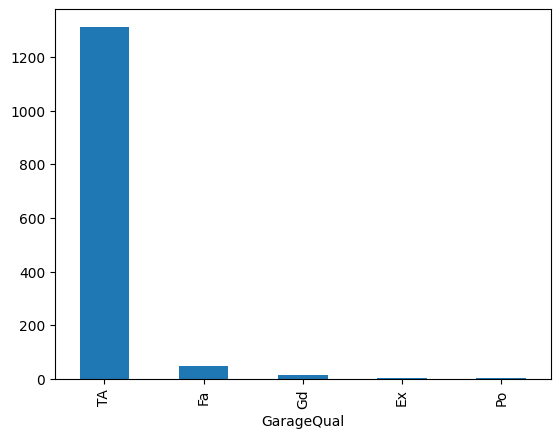

In [9]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()

In [10]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

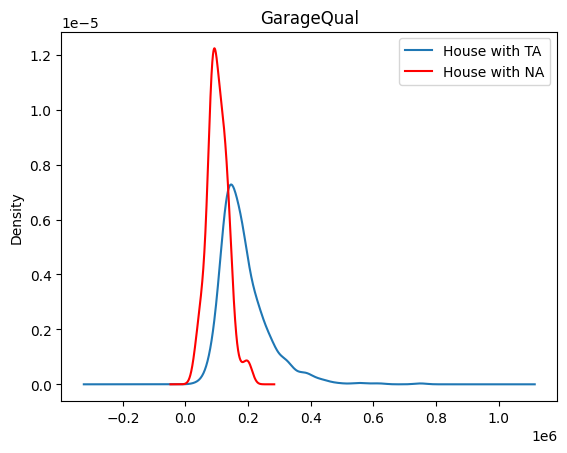

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['House with TA','House with NA'],loc='best')
plt.title('GarageQual')

In [19]:
temp=df[df['GarageQual']=='TA']['SalePrice']

In [20]:
df['GarageQual'].fillna('TA',inplace=True)

<ipython-input-20-f3714f1e83eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

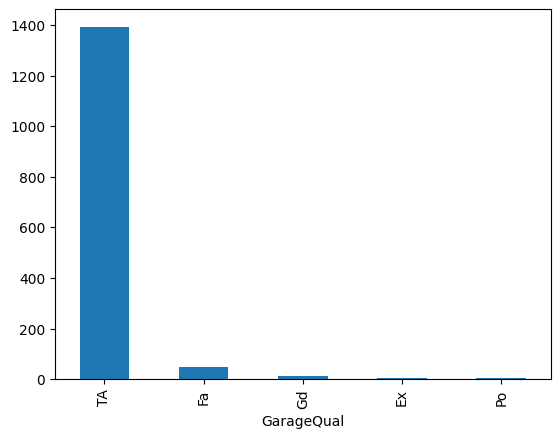

In [22]:
df['GarageQual'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GargeQual')

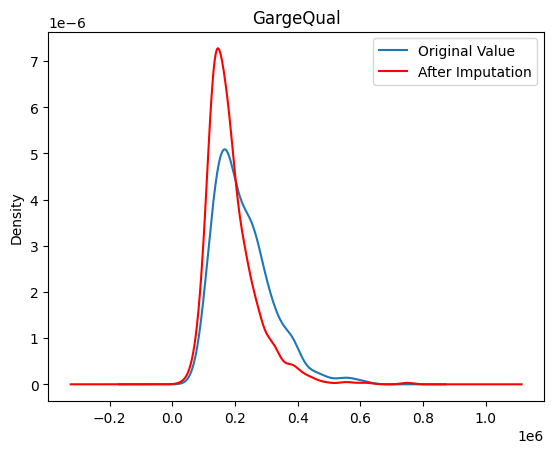

In [41]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of the variable after imputation
df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['Original Value','After Imputation'],loc='best')

plt.title('GargeQual')

<Axes: xlabel='FireplaceQu'>

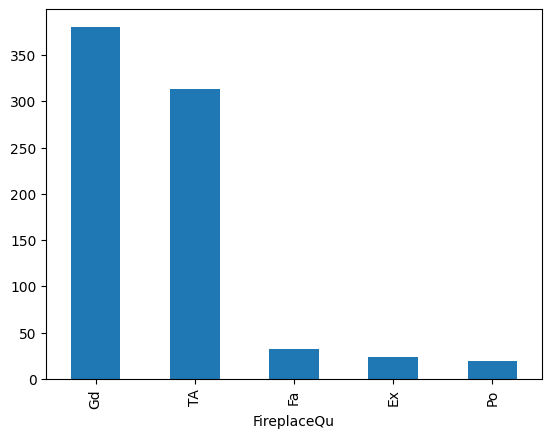

In [25]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [27]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FirePlaceQu')

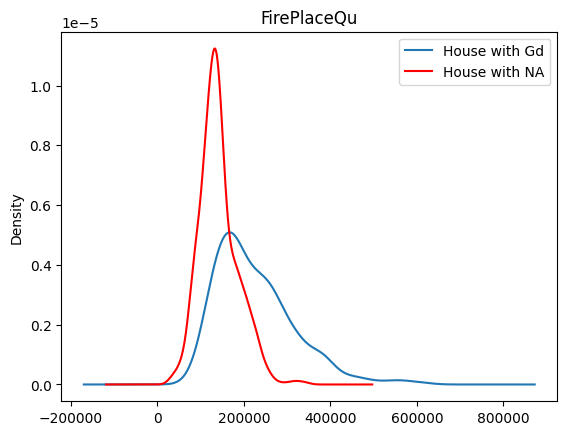

In [36]:
fig=plt.figure()
ax=fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['House with Gd','House with NA'],loc='best')
plt.title('FirePlaceQu')

In [31]:
temp=df[df['FireplaceQu']=='Gd']['SalePrice']

In [37]:
df['FireplaceQu'].fillna('Gd',inplace=True)

<ipython-input-37-ce89ddb63831>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd',inplace=True)


<Axes: xlabel='FireplaceQu'>

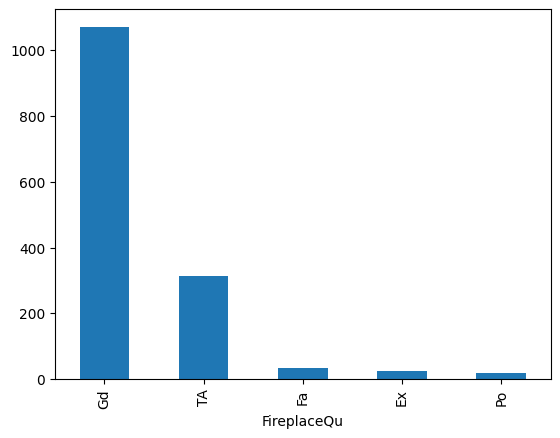

In [38]:
df['FireplaceQu'].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'FireplaceQu')

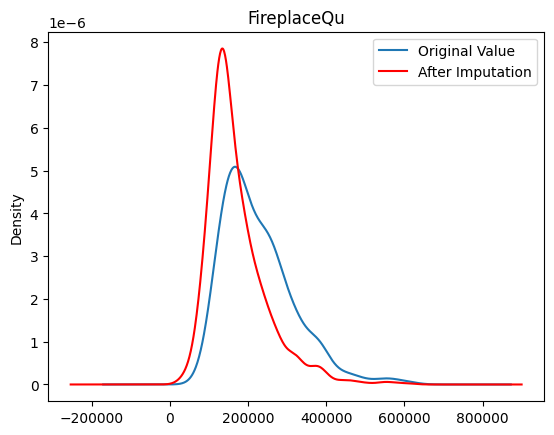

In [40]:
fig=plt.figure()
ax=fig.add_subplot(111)

temp.plot(kind='kde',ax=ax)

#distribution of the variable after imputation
df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,['Original Value','After Imputation'],loc='best')

plt.title('FireplaceQu')

**Using Sklearn**

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'],axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [43]:
from sklearn.impute import SimpleImputer

In [44]:
imputer=SimpleImputer(strategy='most_frequent')

In [45]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [47]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

**Adding new Category Missing**

In [49]:
df=pd.read_csv('train (4).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
565,NaN,TA,128000
133,NaN,TA,220000
14,Fa,TA,157000
1072,TA,TA,91500
384,Fa,TA,240000


<Axes: xlabel='GarageQual'>

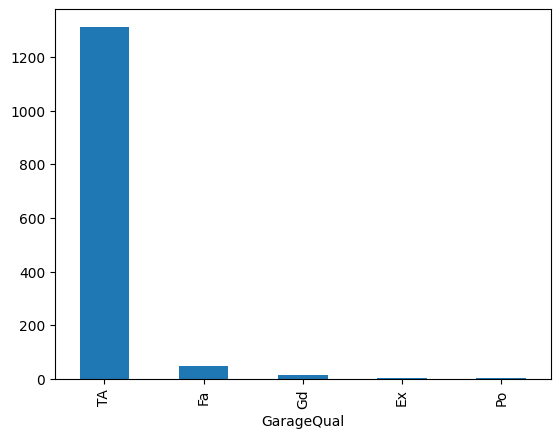

In [52]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

In [54]:
df['GarageQual'].fillna('Missing',inplace=True)

<Axes: xlabel='GarageQual'>

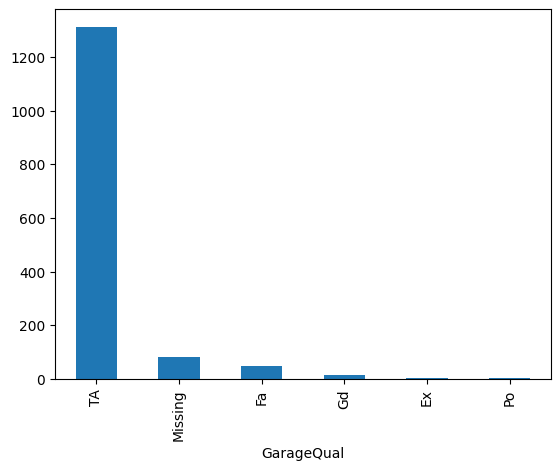

In [55]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot(kind='bar')

**Using Sklearn**

In [56]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['SalePrice'],axis=1),df['SalePrice'],test_size=0.3,random_state=0)

In [57]:
imputer=SimpleImputer(strategy='constant',fill_value='Missing')

In [58]:
X_train=imputer.fit_transform(X_train)
X_test=imputer.transform(X_test)

In [59]:
imputer.statistics_

array(['Missing', 'Missing'], dtype=object)